In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

IMPORT DATA FROM CSV FILE

In [5]:
csv_data = pd.read_csv('C:\\Users\\david.sladkov\\Desktop\\births.csv')

TOP 4 ITEMS IN CSV FILE

In [6]:
csv_data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [7]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [8]:
csv_data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

MAX BIRTHS IN YEAR

In [19]:
births_per_year = csv_data.groupby("year")["births"].sum()


In [21]:
max_births = 0
year_with_max_births = None

In [22]:
for year, total_births in births_per_year.items():
    if total_births > max_births:
        max_births = total_births
        year_with_max_births = year

In [23]:
max_births
year_with_max_births

2007

In [24]:
max_births


4324008

In [25]:
births_per_year


year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

AVG BIRTHS IN MONTHS

In [27]:
births_per_month = csv_data.groupby("month")["births"].mean()

In [28]:
births_per_month

month
1      9467.225881
2      9307.401613
3      9678.506870
4      9390.746698
5      9674.308046
6      9721.327640
7     10219.844037
8     10334.611917
9     10289.465062
10     9904.396024
11     9455.788372
12     9676.540520
Name: births, dtype: float64

<Axes: >

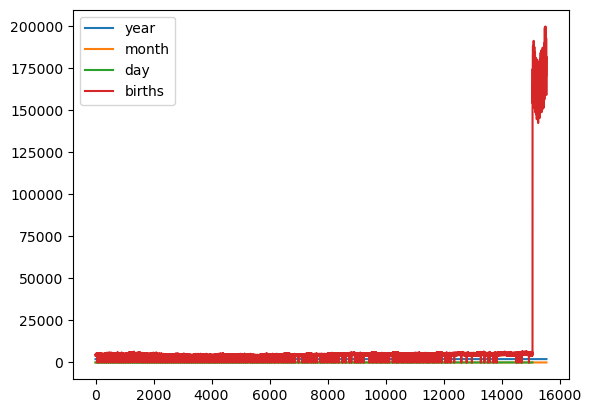

In [29]:
csv_data.plot()

In [43]:
%matplotlib inline 


In [30]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [54]:
plt.plot(births_per_year.index,births_per_year.values,marker='o',linestyle='-',color='b')


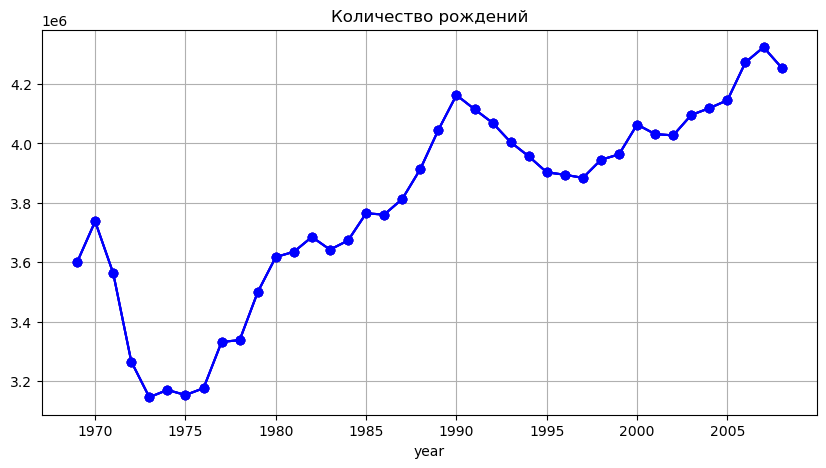

In [56]:
plt.show()

In [ ]:
DIAGRAMM BIRTHS TO MONTHS

In [58]:
births_per_months = csv_data.groupby("month")["births"].sum()

In [59]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

In [60]:
plt.figure(figsize=(12,6))
plt.bar(months,births_per_month.values,color = "blue")

<BarContainer object of 12 artists>

In [61]:
plt.title("Распределение рождений по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Количество рождений", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle="--", alpha=0.7) 


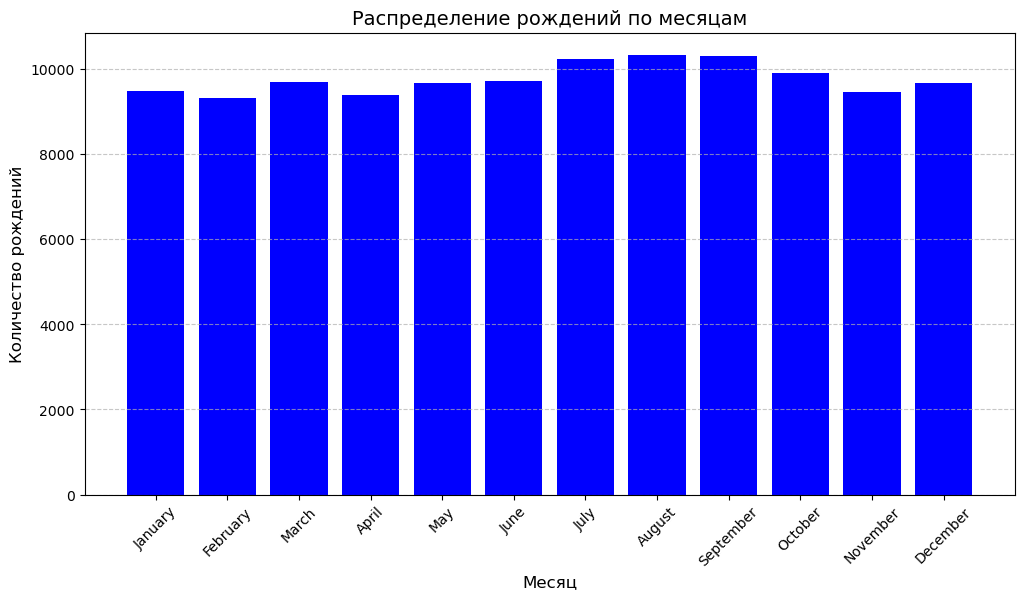

In [62]:
plt.show()

In [64]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

In [65]:
plt.plot(births_per_year.index,births_per_year.values,color = "blue")

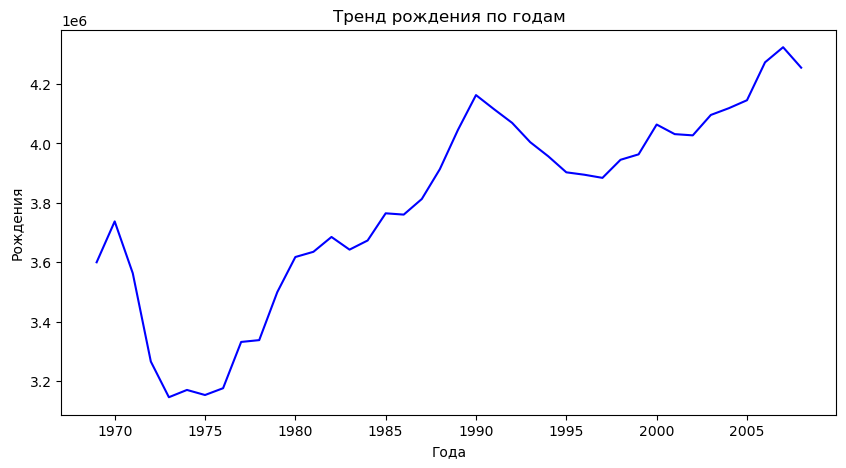

In [66]:
plt.xlabel("Года")
plt.ylabel("Рождения")
plt.title("Тренд рождения по годам")
plt.show()


In [70]:
gender_column = csv_data.gender

In [73]:
gender_column

0        F
1        M
2        F
3        M
4        F
        ..
15542    M
15543    F
15544    M
15545    F
15546    M
Name: gender, Length: 15547, dtype: object

In [76]:
gender_column.count()

15547

In [94]:
male_count = csv_data[csv_data["gender"]=="M"]["births"].sum()
female_count = csv_data[csv_data["gender"]=="F"]["births"].sum()


In [95]:
labels = ["Male","Female"]
counts = [male_count,female_count]




<Figure size 600x600 with 0 Axes>

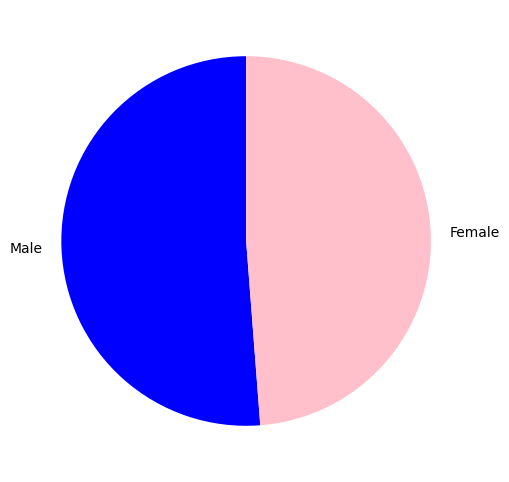

In [97]:
plt.figure(figsize = (6,6))
plt.pie(counts,labels=labels,colors=['blue','pink'],startangle = 90)
plt.show()

In [101]:
births_per_year_gender = csv_data.groupby(["year", "gender"])["births"].sum().unstack()

In [102]:
births_per_year_gender["male_ratio"] = births_per_year_gender["M"] / (births_per_year_gender["M"] + births_per_year_gender["F"]) * 100

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(births_per_year_gender.index, births_per_year_gender["male_ratio"], marker='o', linestyle='-', color='blue')

In [104]:
plt.title("Изменение пропорции мальчиков среди всех рождений по годам")
plt.xlabel("Год")
plt.ylabel("Процент мальчиков (%)")
plt.grid(True)

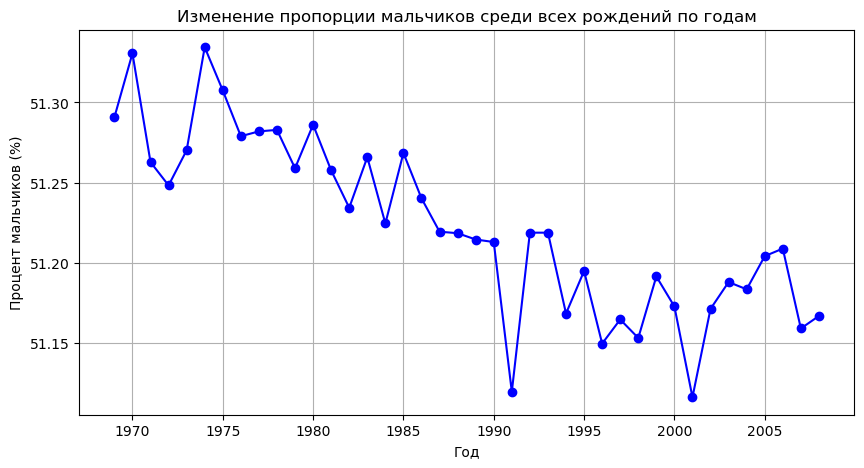

In [105]:
plt.show()